In [225]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve



In [226]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 22})

In [227]:
%matplotlib inline

In [228]:
covid_ng = pd.read_excel('data/records_covid19.xlsx', parse_dates=['Dates'],sheet_name='experimentation')
deathby_state = pd.read_csv('data/cases23052020.csv')

In [229]:
pd.set_option('display.max_columns', 60)

In [230]:
covid_ng.head()

,Dates,Lagos,Abuja(FCT),Kano,Ogun,Osun,Gombe,Katsina,Borno,Edo,Oyo,Kwara,Akwa Ibom,Bauchi,Kaduna,Ekiti,Ondo,Delta,Rivers,Jigawa,Enugu,Niger,Abia,Zamfara,Sokoto,Benue,Anambra,Adamawa,Plateau,Imo,Kebbi,Kogi,Nasarawa,Taraba,Yobe,Bayelsa,Ebonyi,Cross River,Dischared/Revovered,Dealth
0,2020-02-27 15:40:38,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-02-28 01:00:36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-02-29 02:26:52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-03-01 22:44:08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-03-02 11:53:02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [231]:
covid_ng.tail()

,Dates,Lagos,Abuja(FCT),Kano,Ogun,Osun,Gombe,Katsina,Borno,Edo,Oyo,Kwara,Akwa Ibom,Bauchi,Kaduna,Ekiti,Ondo,Delta,Rivers,Jigawa,Enugu,Niger,Abia,Zamfara,Sokoto,Benue,Anambra,Adamawa,Plateau,Imo,Kebbi,Kogi,Nasarawa,Taraba,Yobe,Bayelsa,Ebonyi,Cross River,Dischared/Revovered,Dealth
88,2020-05-18 15:53:22,74,4,17,8,0,8,33,8,13,19,7,0,7,3,0,0,0,2,0,3,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,9
89,2020-05-19 15:39:07,131,5,0,25,0,2,0,4,11,6,0,0,2,7,0,0,0,0,4,1,0,0,0,0,0,0,5,15,0,0,0,3,0,0,1,4,0,90,1
90,2020-05-20 15:20:41,199,8,5,0,0,0,0,8,0,19,1,0,0,0,1,0,1,26,6,0,0,2,0,0,0,0,0,7,0,0,0,0,1,0,0,0,0,106,8
91,2020-05-21 15:48:23,139,11,28,5,0,8,22,0,25,28,0,0,4,18,0,2,3,1,14,0,0,0,0,0,0,0,1,13,0,0,0,4,0,13,0,0,0,67,11
92,2020-05-22 15:35:01,131,1,8,13,0,1,5,12,0,9,7,3,2,9,0,1,0,9,16,0,1,0,0,3,0,1,0,1,0,0,0,0,0,2,1,9,0,100,10


In [232]:
covid_ng.shape

(93, 40)

In [233]:
covid_ng.columns

Index(['Dates', 'Lagos', 'Abuja(FCT)', 'Kano', 'Ogun', 'Osun', 'Gombe',
       'Katsina', 'Borno', 'Edo', 'Oyo', 'Kwara', 'Akwa Ibom', 'Bauchi',
       'Kaduna', 'Ekiti', 'Ondo', 'Delta', 'Rivers', 'Jigawa', 'Enugu',
       'Niger', 'Abia', 'Zamfara', 'Sokoto', 'Benue', 'Anambra', 'Adamawa',
       'Plateau', 'Imo', 'Kebbi', 'Kogi', 'Nasarawa', 'Taraba', 'Yobe',
       'Bayelsa', 'Ebonyi', 'Cross River', 'Dischared/Revovered', 'Dealth'],
      dtype='object')

In [234]:
exp_wip = covid_ng.copy()

In [235]:
exp_wip.head()

,Dates,Lagos,Abuja(FCT),Kano,Ogun,Osun,Gombe,Katsina,Borno,Edo,Oyo,Kwara,Akwa Ibom,Bauchi,Kaduna,Ekiti,Ondo,Delta,Rivers,Jigawa,Enugu,Niger,Abia,Zamfara,Sokoto,Benue,Anambra,Adamawa,Plateau,Imo,Kebbi,Kogi,Nasarawa,Taraba,Yobe,Bayelsa,Ebonyi,Cross River,Dischared/Revovered,Dealth
0,2020-02-27 15:40:38,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-02-28 01:00:36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-02-29 02:26:52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-03-01 22:44:08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-03-02 11:53:02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [236]:
#Extract geopolitical zone
exp_wip['South_West'] = exp_wip['Lagos'] + exp_wip['Ondo'] + exp_wip['Osun'] + exp_wip['Oyo'] + \
exp_wip['Ekiti'] + exp_wip['Ogun']

exp_wip['South_South'] = exp_wip['Edo'] + exp_wip['Rivers'] + exp_wip['Delta'] + exp_wip['Cross River'] + \
exp_wip['Bayelsa'] + exp_wip['Akwa Ibom']

exp_wip['South_East'] = exp_wip['Anambra'] + exp_wip['Imo'] + exp_wip['Enugu'] + exp_wip['Abia'] + \
exp_wip['Ebonyi']

exp_wip['North_Central'] = exp_wip['Benue'] + exp_wip['Kogi'] + exp_wip['Nasarawa'] + exp_wip['Niger'] + \
exp_wip['Plateau'] + exp_wip['Kwara']

exp_wip['North_East'] = exp_wip['Adamawa'] + exp_wip['Bauchi'] + exp_wip['Borno'] + exp_wip['Gombe'] + \
exp_wip['Taraba'] + exp_wip['Yobe']

exp_wip['North_West'] = exp_wip['Jigawa'] + exp_wip['Kaduna'] + exp_wip['Kano'] + exp_wip['Katsina'] + \
exp_wip['Kebbi'] + exp_wip['Sokoto'] + exp_wip['Zamfara']


In [237]:
exp_wip.tail()

,Dates,Lagos,Abuja(FCT),Kano,Ogun,Osun,Gombe,Katsina,Borno,Edo,Oyo,Kwara,Akwa Ibom,Bauchi,Kaduna,Ekiti,Ondo,Delta,Rivers,Jigawa,Enugu,Niger,Abia,Zamfara,Sokoto,Benue,Anambra,Adamawa,Plateau,Imo,Kebbi,Kogi,Nasarawa,Taraba,Yobe,Bayelsa,Ebonyi,Cross River,Dischared/Revovered,Dealth,South_West,South_South,South_East,North_Central,North_East,North_West
88,2020-05-18 15:53:22,74,4,17,8,0,8,33,8,13,19,7,0,7,3,0,0,0,2,0,3,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,9,101,15,3,7,23,55
89,2020-05-19 15:39:07,131,5,0,25,0,2,0,4,11,6,0,0,2,7,0,0,0,0,4,1,0,0,0,0,0,0,5,15,0,0,0,3,0,0,1,4,0,90,1,162,12,5,18,13,11
90,2020-05-20 15:20:41,199,8,5,0,0,0,0,8,0,19,1,0,0,0,1,0,1,26,6,0,0,2,0,0,0,0,0,7,0,0,0,0,1,0,0,0,0,106,8,219,27,2,8,9,11
91,2020-05-21 15:48:23,139,11,28,5,0,8,22,0,25,28,0,0,4,18,0,2,3,1,14,0,0,0,0,0,0,0,1,13,0,0,0,4,0,13,0,0,0,67,11,174,29,0,17,26,82
92,2020-05-22 15:35:01,131,1,8,13,0,1,5,12,0,9,7,3,2,9,0,1,0,9,16,0,1,0,0,3,0,1,0,1,0,0,0,0,0,2,1,9,0,100,10,154,13,10,9,17,41


In [238]:
#format header columns
def clean_col(name):
    return name.strip().lower().replace(" ", "_").replace('/','_')


In [239]:
exp_wip_col_clean = exp_wip.rename(columns=clean_col)

In [240]:
exp_wip_col_clean.head()

,dates,lagos,abuja(fct),kano,ogun,osun,gombe,katsina,borno,edo,oyo,kwara,akwa_ibom,bauchi,kaduna,ekiti,ondo,delta,rivers,jigawa,enugu,niger,abia,zamfara,sokoto,benue,anambra,adamawa,plateau,imo,kebbi,kogi,nasarawa,taraba,yobe,bayelsa,ebonyi,cross_river,dischared_revovered,dealth,south_west,south_south,south_east,north_central,north_east,north_west
0,2020-02-27 15:40:38,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2020-02-28 01:00:36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-02-29 02:26:52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-03-01 22:44:08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-03-02 11:53:02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [241]:
exp_wip_col_clean.rename(columns={'abuja(fct)': 'abuja','dealth':'death','dischared_revovered':'discharged_recovered'}, inplace=True)

In [242]:
exp_wip_col_clean.tail()

,dates,lagos,abuja,kano,ogun,osun,gombe,katsina,borno,edo,oyo,kwara,akwa_ibom,bauchi,kaduna,ekiti,ondo,delta,rivers,jigawa,enugu,niger,abia,zamfara,sokoto,benue,anambra,adamawa,plateau,imo,kebbi,kogi,nasarawa,taraba,yobe,bayelsa,ebonyi,cross_river,discharged_recovered,death,south_west,south_south,south_east,north_central,north_east,north_west
88,2020-05-18 15:53:22,74,4,17,8,0,8,33,8,13,19,7,0,7,3,0,0,0,2,0,3,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,9,101,15,3,7,23,55
89,2020-05-19 15:39:07,131,5,0,25,0,2,0,4,11,6,0,0,2,7,0,0,0,0,4,1,0,0,0,0,0,0,5,15,0,0,0,3,0,0,1,4,0,90,1,162,12,5,18,13,11
90,2020-05-20 15:20:41,199,8,5,0,0,0,0,8,0,19,1,0,0,0,1,0,1,26,6,0,0,2,0,0,0,0,0,7,0,0,0,0,1,0,0,0,0,106,8,219,27,2,8,9,11
91,2020-05-21 15:48:23,139,11,28,5,0,8,22,0,25,28,0,0,4,18,0,2,3,1,14,0,0,0,0,0,0,0,1,13,0,0,0,4,0,13,0,0,0,67,11,174,29,0,17,26,82
92,2020-05-22 15:35:01,131,1,8,13,0,1,5,12,0,9,7,3,2,9,0,1,0,9,16,0,1,0,0,3,0,1,0,1,0,0,0,0,0,2,1,9,0,100,10,154,13,10,9,17,41


In [243]:
#extract the total daily cases
exp_wip_col_clean['total_daily_cases'] = exp_wip_col_clean['lagos'] + exp_wip_col_clean['abuja'] + \
exp_wip_col_clean['kano'] + exp_wip_col_clean['ogun'] + exp_wip_col_clean['osun'] + \
exp_wip_col_clean['gombe'] + exp_wip_col_clean['katsina'] + exp_wip_col_clean['borno'] + \
exp_wip_col_clean['edo'] + exp_wip_col_clean['oyo'] + exp_wip_col_clean['kwara'] + \
exp_wip_col_clean['akwa_ibom'] + exp_wip_col_clean['kaduna'] + exp_wip_col_clean['ekiti'] + exp_wip_col_clean['ondo'] + \
exp_wip_col_clean['delta'] + exp_wip_col_clean['rivers'] + exp_wip_col_clean['jigawa'] + exp_wip_col_clean['enugu'] + \
exp_wip_col_clean['niger'] + exp_wip_col_clean['abia'] + exp_wip_col_clean['zamfara'] +  exp_wip_col_clean['sokoto'] + \
exp_wip_col_clean['benue'] + exp_wip_col_clean['anambra'] + exp_wip_col_clean['adamawa'] + exp_wip_col_clean['plateau'] + \
exp_wip_col_clean['imo'] + exp_wip_col_clean['kebbi'] + exp_wip_col_clean['kogi'] + exp_wip_col_clean['nasarawa'] + \
exp_wip_col_clean['taraba'] + exp_wip_col_clean['yobe'] + exp_wip_col_clean['bayelsa'] + exp_wip_col_clean['ebonyi'] + \
exp_wip_col_clean['cross_river'] + exp_wip_col_clean['bauchi']

In [244]:
exp_wip_col_clean['total_daily_cases'].tail()

88    208
89    226
90    284
91    339
92    245
Name: total_daily_cases, dtype: int64

In [245]:
exp_wip_col_clean['death'].tail()

88     9
89     1
90     8
91    11
92    10
Name: death, dtype: int64

In [246]:
exp_wip_col_clean.columns

Index(['dates', 'lagos', 'abuja', 'kano', 'ogun', 'osun', 'gombe', 'katsina',
       'borno', 'edo', 'oyo', 'kwara', 'akwa_ibom', 'bauchi', 'kaduna',
       'ekiti', 'ondo', 'delta', 'rivers', 'jigawa', 'enugu', 'niger', 'abia',
       'zamfara', 'sokoto', 'benue', 'anambra', 'adamawa', 'plateau', 'imo',
       'kebbi', 'kogi', 'nasarawa', 'taraba', 'yobe', 'bayelsa', 'ebonyi',
       'cross_river', 'discharged_recovered', 'death', 'south_west',
       'south_south', 'south_east', 'north_central', 'north_east',
       'north_west', 'total_daily_cases'],
      dtype='object')

In [247]:
# implement tidy data principles; melt individual states into one column:'states' 
#and geopolitical zone into 'zones'
tidy_covid1 = exp_wip_col_clean.melt(id_vars=['dates','discharged_recovered', 'death','total_daily_cases','south_west','south_south', 'south_east', 'north_central','north_east','north_west'], 
                                   value_vars=['lagos', 'abuja', 'kano', 'ogun', 'osun', 'gombe', 'katsina','borno', 'edo', 'oyo', 'kwara', 'akwa_ibom', 'bauchi', 'kaduna','ekiti', 'ondo', 'delta', 'rivers', 'jigawa', 'enugu', 'niger', 'abia','zamfara', 'sokoto', 'benue', 'anambra', 'adamawa', 'plateau', 'imo','kebbi', 'kogi', 'nasarawa', 'taraba', 'yobe', 'bayelsa', 'ebonyi','cross_river'],
                                   var_name='states', value_name='cases_state')

In [248]:
tidy_covid1.head()

,dates,discharged_recovered,death,total_daily_cases,south_west,south_south,south_east,north_central,north_east,north_west,states,cases_state
0,2020-02-27 15:40:38,0,0,1,1,0,0,0,0,0,lagos,1
1,2020-02-28 01:00:36,0,0,0,0,0,0,0,0,0,lagos,0
2,2020-02-29 02:26:52,0,0,0,0,0,0,0,0,0,lagos,0
3,2020-03-01 22:44:08,0,0,0,0,0,0,0,0,0,lagos,0
4,2020-03-02 11:53:02,0,0,0,0,0,0,0,0,0,lagos,0


In [249]:
#collapse zones into one column
tidy_covid_all = tidy_covid1.melt(id_vars=['dates','discharged_recovered', 'death','total_daily_cases','states','cases_state'], value_vars=['south_west','south_south', 'south_east', 'north_central','north_east','north_west'],
                                 var_name='geopolitical_zones', value_name='cases_zones')

In [250]:
tidy_covid_all.tail()

,dates,discharged_recovered,death,total_daily_cases,states,cases_state,geopolitical_zones,cases_zones
20641,2020-05-18 15:53:22,50,9,208,cross_river,0,north_west,55
20642,2020-05-19 15:39:07,90,1,226,cross_river,0,north_west,11
20643,2020-05-20 15:20:41,106,8,284,cross_river,0,north_west,11
20644,2020-05-21 15:48:23,67,11,339,cross_river,0,north_west,82
20645,2020-05-22 15:35:01,100,10,245,cross_river,0,north_west,41


###  Average Daily Cases By Geopolitical Zone

In [251]:
tidy_covid_all['geopolitical_zones'].unique()

array(['south_west', 'south_south', 'south_east', 'north_central',
       'north_east', 'north_west'], dtype=object)

In [252]:
average_zones_cases = tidy_covid_all.groupby('geopolitical_zones').agg({'cases_zones':'mean'}).reset_index()

In [253]:
average_zones_cases

,geopolitical_zones,cases_zones
0,north_central,2.311828
1,north_east,7.677419
2,north_west,19.752688
3,south_east,0.623656
4,south_south,3.161290
5,south_west,39.817204


In [254]:
sns.set(style='whitegrid')

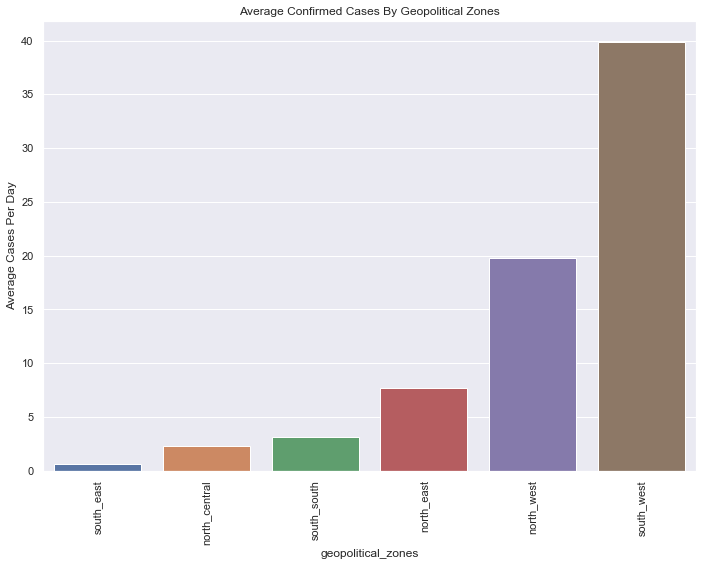

In [255]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='geopolitical_zones', y='cases_zones', data=average_zones_cases, order=['south_east','north_central','south_south','north_east','north_west','south_west']);
ax.set_title('Average Confirmed Cases By Geopolitical Zones')
ax.set_ylabel('Average Cases Per Day')
plt.xticks(rotation=90)
plt.show()

### Monthly  Case Fatality Rate And Mortality Rate

In [256]:
month_fatality = exp_wip_col_clean[['dates', 'death', 'total_daily_cases', 'discharged_recovered']]

In [257]:
#set dates as index
month_fatality_index = month_fatality.set_index('dates')
month_fatality_index.head()

,death,total_daily_cases,discharged_recovered
dates,,,
2020-02-27 15:40:38,0,1,0
2020-02-28 01:00:36,0,0,0
2020-02-29 02:26:52,0,0,0
2020-03-01 22:44:08,0,0,0
2020-03-02 11:53:02,0,0,0


In [258]:
#group cases into months
month_fatality_index_group = month_fatality_index.resample('M').agg({'death': 'sum', 'total_daily_cases':'sum','discharged_recovered':'sum'}).reset_index()
month_fatality_index_group.head()

,dates,death,total_daily_cases,discharged_recovered
0,2020-02-29,0,1,0
1,2020-03-31,2,137,9
2,2020-04-30,56,1791,310
3,2020-05-31,163,5339,1688


In [259]:
#case fatality and mortality calculation
month_fatality_index_group['case_fatality'] = month_fatality_index_group['death'] / month_fatality_index_group['total_daily_cases']
month_fatality_index_group['mortality_rate'] = month_fatality_index_group['death']/1000
month_fatality_index_group['month'] = month_fatality_index_group['dates'].dt.month

In [260]:
month_fatality_index_group.head()

,dates,death,total_daily_cases,discharged_recovered,case_fatality,mortality_rate,month
0,2020-02-29,0,1,0,0.000000,0.000,2
1,2020-03-31,2,137,9,0.014599,0.002,3
2,2020-04-30,56,1791,310,0.031267,0.056,4
3,2020-05-31,163,5339,1688,0.030530,0.163,5


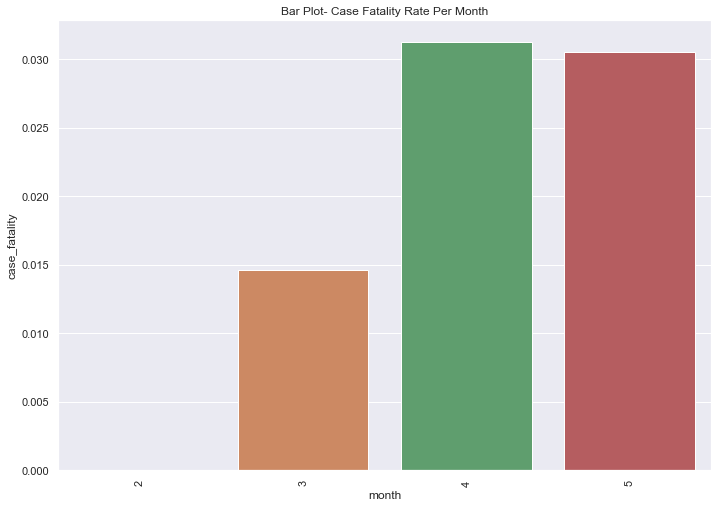

In [261]:
#visualize monthly fatality rate
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='month', y='case_fatality', data=month_fatality_index_group)
ax.set_title('Bar Plot- Case Fatality Rate Per Month')
plt.xticks(rotation = 90)
plt.show()


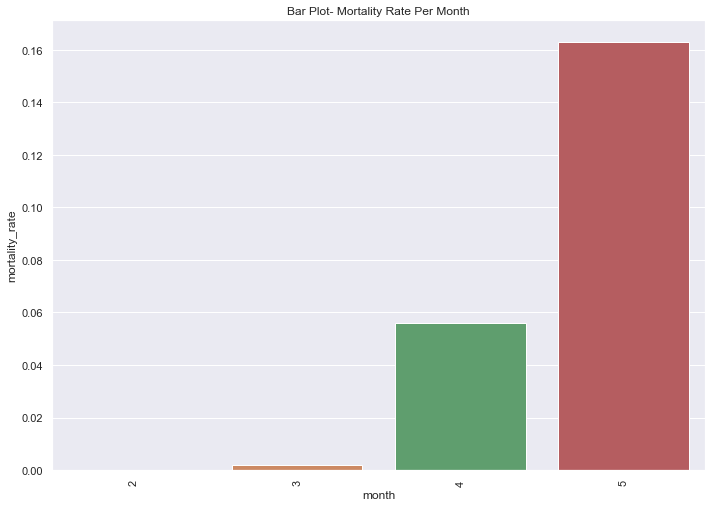

In [262]:
#visualize Mortality rate
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='month', y='mortality_rate', data=month_fatality_index_group)
ax.set_title('Bar Plot- Mortality Rate Per Month')
plt.xticks(rotation = 90)
plt.show()


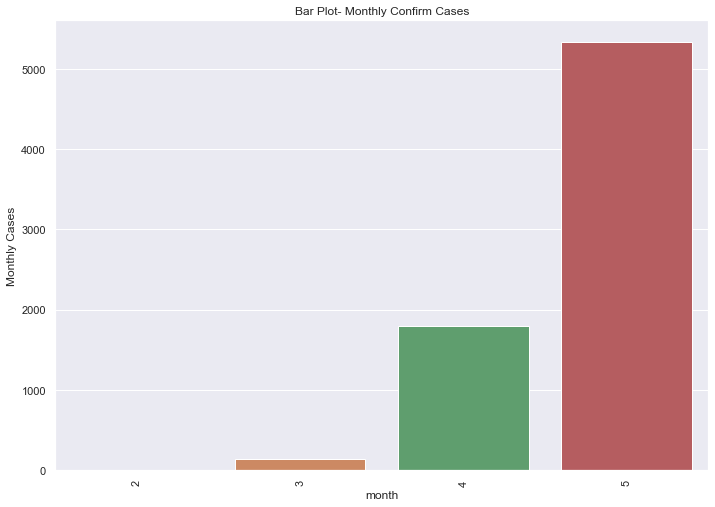

In [263]:
# Monthly confirmed cases
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='month', y='total_daily_cases', data=month_fatality_index_group)
ax.set_title('Bar Plot- Monthly Confirm Cases')
ax.set_ylabel('Monthly Cases')
plt.xticks(rotation = 90)
plt.show()

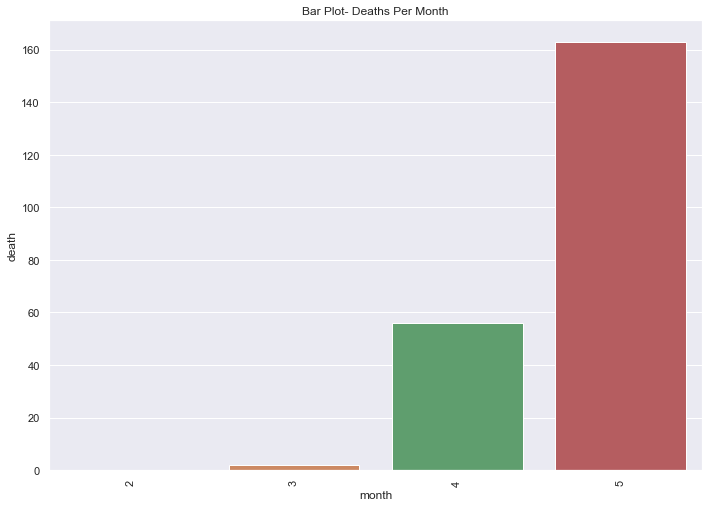

In [264]:
#Monthly Deaths
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='month', y='death', data=month_fatality_index_group)
ax.set_title('Bar Plot- Deaths Per Month')
plt.xticks(rotation = 90)
plt.show()

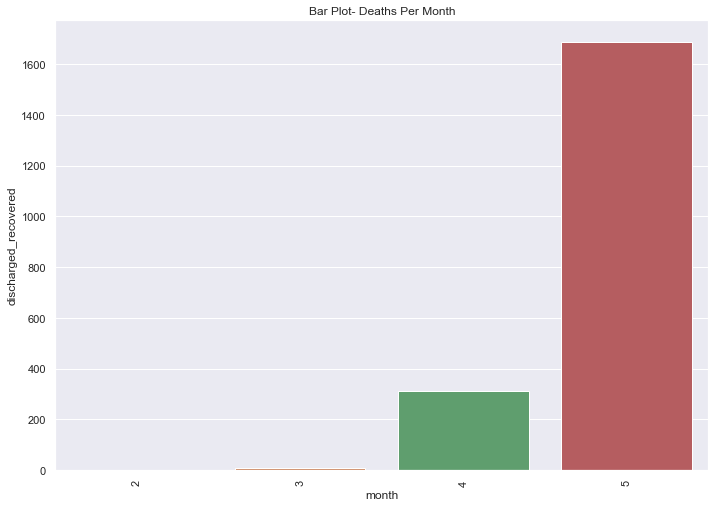

In [265]:
#Number of Recoveries by Month
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='month', y='discharged_recovered', data=month_fatality_index_group)
ax.set_title('Bar Plot- Deaths Per Month')
plt.xticks(rotation = 90)
plt.show()

### Death By States

In [266]:
deathby_state.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"3,224","2,600",582,42
1,Kano,883,714,133,36
2,FCT,447,290,143,14
3,Katsina,308,243,51,14
4,Borno,247,111,111,25


In [267]:
deathby_state['No. of Cases (Lab Confirmed)'] = deathby_state['No. of Cases (Lab Confirmed)'].str.replace(',','')
deathby_state['No. of Cases (Lab Confirmed)'] = deathby_state['No. of Cases (Lab Confirmed)'].astype('int64')


In [268]:
state_stats = deathby_state.groupby('States Affected').agg({'No. Discharged':'max', 'No. of Deaths':'max','No. of Cases (Lab Confirmed)':'max'}).reset_index()
state_stats.head()

,States Affected,No. Discharged,No. of Deaths,No. of Cases (Lab Confirmed)
0,Abia,1,0,7
1,Adamawa,13,2,27
2,Akwa Ibom,12,2,21
3,Anambra,1,0,6
4,Bauchi,156,5,230


In [269]:
deaths_stats = state_stats[['States Affected','No. of Deaths']].sort_values('No. of Deaths', ascending=False)
deaths_stats.head()

,States Affected,No. of Deaths
22,Lagos,42
18,Kano,36
7,Borno,25
13,FCT,14
19,Katsina,14


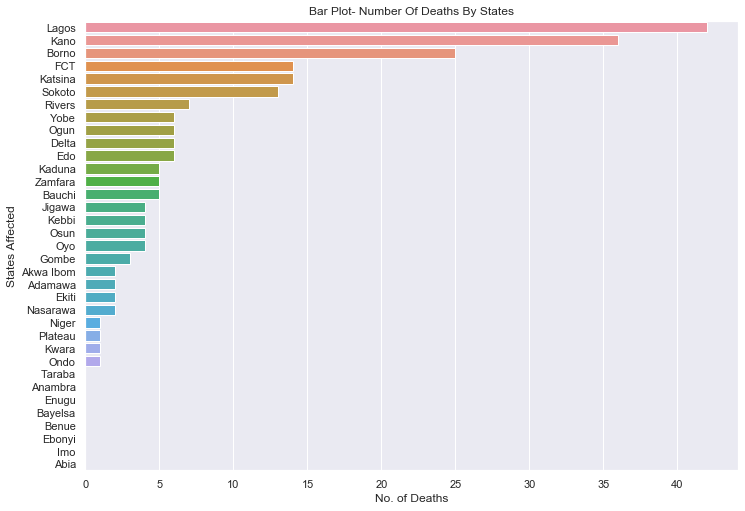

In [270]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='No. of Deaths', y='States Affected', data=deaths_stats)
ax.set_title('Bar Plot- Number Of Deaths By States')
#plt.yticks(rotation=90)
plt.show()

### Recoveries/Discharged By States

In [271]:
discharged_stats = state_stats[['No. Discharged', 'States Affected']].sort_values('No. Discharged',ascending=False)
discharged_stats.head()

,No. Discharged,States Affected
22,582,Lagos
4,156,Bauchi
13,143,FCT
18,133,Kano
7,111,Borno


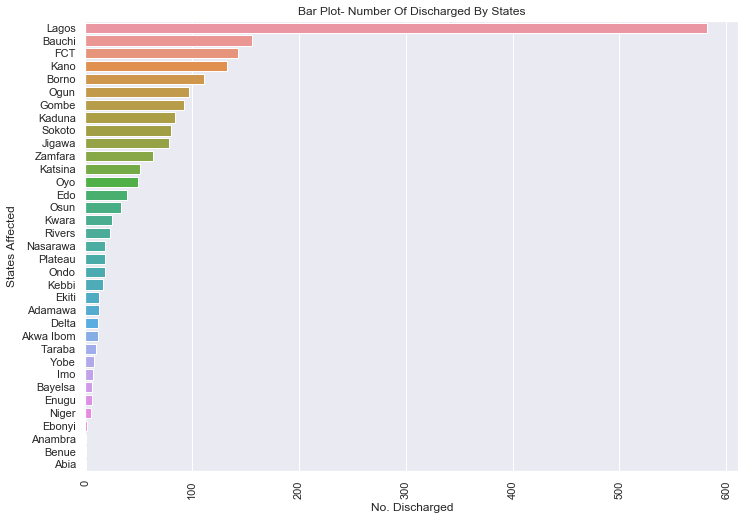

In [272]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='No. Discharged',y='States Affected', data=discharged_stats)
ax.set_title('Bar Plot- Number Of Discharged By States')
plt.xticks(rotation=90)
plt.show()

In [273]:
confirmed_cases_states = state_stats[['States Affected','No. of Cases (Lab Confirmed)']].sort_values('No. of Cases (Lab Confirmed)', ascending=False)
confirmed_cases_states.head()

,States Affected,No. of Cases (Lab Confirmed)
22,Lagos,3224
18,Kano,883
13,FCT,447
19,Katsina,308
7,Borno,247


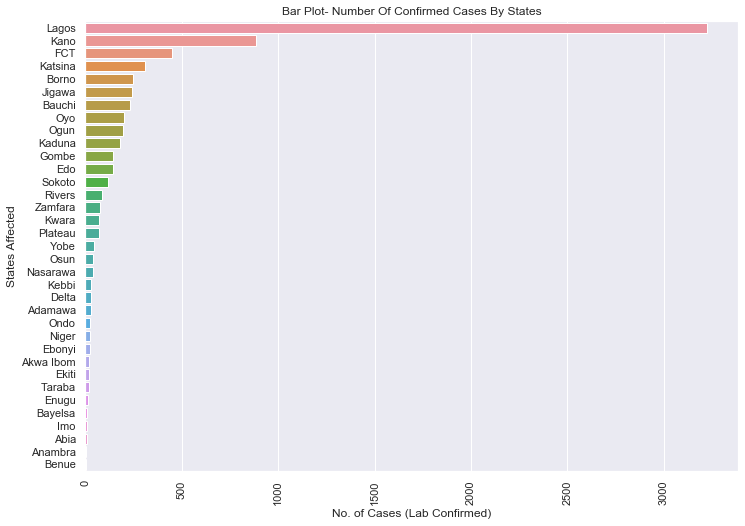

In [274]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='No. of Cases (Lab Confirmed)',y='States Affected', data=confirmed_cases_states)
ax.set_title('Bar Plot- Number Of Confirmed Cases By States')
plt.xticks(rotation=90)
plt.show()

### Predicting the Epidemic Situation of Covid19 In Nigeria with Logistic Mathematical Model
My choice of the Logistic Model is simply because it is simple and it conform to the statistical law of Epidemiology

In [275]:
#extract the data we need for building the Logistic Model
model_data = exp_wip_col_clean[['dates', 'death','total_daily_cases']]
model_data.head()

,dates,death,total_daily_cases
0,2020-02-27 15:40:38,0,1
1,2020-02-28 01:00:36,0,0
2,2020-02-29 02:26:52,0,0
3,2020-03-01 22:44:08,0,0
4,2020-03-02 11:53:02,0,0


In [276]:
#create a cummulative sum columns
model_data['cum_daily_cases'] = model_data['total_daily_cases'].cumsum()


/Users/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [277]:
cum_data = model_data[['dates', 'cum_daily_cases']]
cum_data.head()

,dates,cum_daily_cases
0,2020-02-27 15:40:38,1
1,2020-02-28 01:00:36,1
2,2020-02-29 02:26:52,1
3,2020-03-01 22:44:08,1
4,2020-03-02 11:53:02,1


In [278]:
cum_data.tail()

,dates,cum_daily_cases
88,2020-05-18 15:53:22,6174
89,2020-05-19 15:39:07,6400
90,2020-05-20 15:20:41,6684
91,2020-05-21 15:48:23,7023
92,2020-05-22 15:35:01,7268


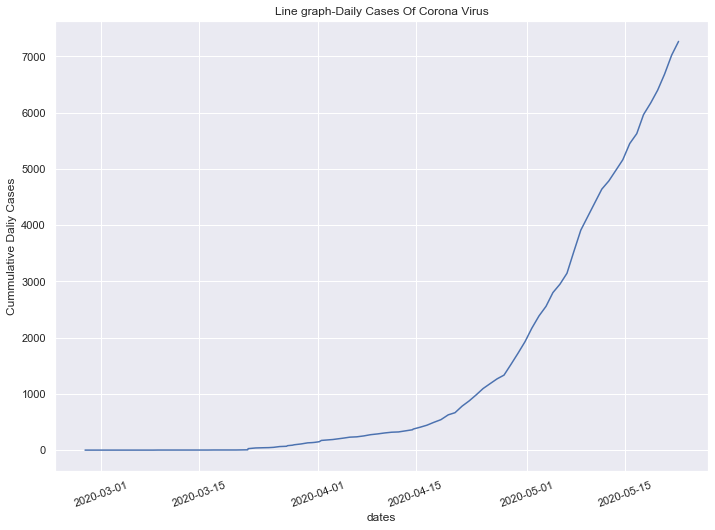

In [279]:
#Line graph of confirm cases over time
ax = sns.lineplot(x='dates', y='cum_daily_cases', data=cum_data)
plt.xticks(rotation=20)
ax.set_title('Line graph-Daily Cases Of Corona Virus')
ax.set_ylabel('Cummulative Daliy Cases')
plt.show()




## Build Logistic Model
The logistic model can be simply rendered as $\huge f(x,a.b.c)$ $\huge =$ $\huge \frac{c}{1 + e^-(x-b)/a}$ 

where :
- a = **Infection speed**
- b = **Day with maximum Infections Occured**
- c = **Total Number of people that would be infected at the end of the pandemic**

In [280]:
def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))